# Question

You are supposed to create a visualization for the sidebar of a Wikipedia page; particularly, the page concerns the entity 'Colorado' (USA state).

Step 1:
collect data on further cities located in the state of Colorado ('N' is up to you)

Step 2 ― using Matplotlib, create a chart that:
replicates the minimal map achieved in class using Turtle
contains color for visual appeal and further clarity
has a map legend/key for different features
has a background image representing the boundaries of 'Colorado' (tip: you may want to use ax.imshow())

# Setting up

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
%matplotlib inline

In [16]:
# Set the Population and coordinate of Colorado
NAME  = 0
POINTS = 1 
POP = 2

state = ["COLORADO",
         [
             [-109,37], [-109,41],
             [-102,37], [-102,41]             
         ], 5187582
]


In [17]:
#Fix map size
map_width = 400
map_height = 300

minx = 180
maxx = -180
miny = 90
maxy = -90

for x, y in state[POINTS]:
    if x < minx: minx = x
    elif x > maxx: maxx = x
    if y < miny: miny = y
    elif y > maxy: maxy = y

# Setting the city and coordinates

In [18]:
City = ["DENVER","BOULDER","PUEBLO",
        "COLORADO SPRINGS","MONTROSE",
         "CORTEZ","BAYFIELD","GRAND JUNCTION"]

Pop = [704621,107125,111127,
       464474,19305,8709,2687,62475]

y = [-104.98,-105.27,-104.61,
     -104.82,-107.88,-108.59,-107.60,-108.55]

x = [39.74,40.02,38.25,38.83,38.48,37.35,37.23,39.06]

# Putting the data into a dataframe

In [19]:
df = {"City" : City, 
      "pop": Pop, 
      "lat":x, 
      "long":y
     }
df = pd.DataFrame(df)
df

,City,pop,lat,long
0,DENVER,704621,39.74,-104.98
1,BOULDER,107125,40.02,-105.27
2,PUEBLO,111127,38.25,-104.61
3,COLORADO SPRINGS,464474,38.83,-104.82
4,MONTROSE,19305,38.48,-107.88
5,CORTEZ,8709,37.35,-108.59
6,BAYFIELD,2687,37.23,-107.60
7,GRAND JUNCTION,62475,39.06,-108.55


In [20]:
#Image setting
im = mpimg.imread('Map3.png')
extent = (minx, maxx, miny, maxy)

# Plotting the graph

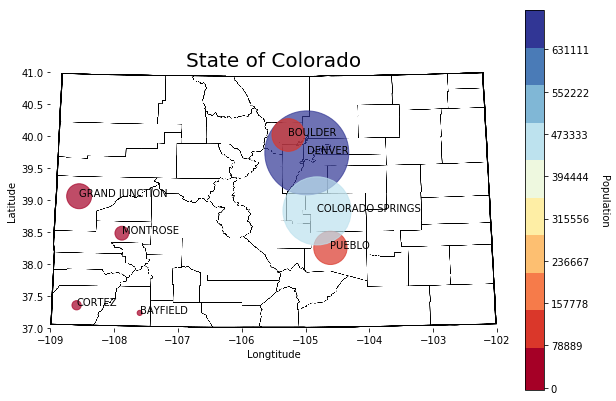

In [21]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)

#image show
ax.imshow(im, extent = extent)

#setting the ledgend 
ax.set_title('State of Colorado', size = 20) 
ax.set_ylabel('Latitude')
ax.set_xlabel('Longtitude')

#add colour bar
cmap = plt.get_cmap('RdYlBu',10)
norm = mpl.colors.Normalize(vmin = 0, vmax = 710000)
sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
sm.set_array([])

cbar = plt.colorbar(sm, ticks=np.linspace(0, 710000, 10), 
             boundaries=np.arange(-5000, 710000, 10000))
cbar.set_label('Population', rotation=270, labelpad=20)

#Hide the Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Plot the City
ax.scatter(df['long'],df['lat'],s= df['pop'] / 100,c = df['pop'], vmin = 0, 
           vmax = 710000, cmap = cmap, alpha = 0.7)

#Showing the name for each city
for i, txt in enumerate(City):
    ax.annotate(txt, (y[i], x[i]))
    

plt.show()

On this visulisation, the population is represented by both the size of the scatter points and the colour of each city.